19/11/2015

**Jorge Vera Moreno**

# Plotting a function defined by a series

In this notebook, we will learn how to define, plot and manipulate a function defined by a series.

Our function is the square wave, as defined by:

$$f_\text{square}(x) = \frac{4}{\pi} \sum_{n = 1, 3, 5, \ldots}^{\infty} \frac{1}{n} \sin\left(\frac{n \pi x}{L}\right) \qquad \qquad $$

First, we import **NumPy** and the modules _interactive_ and _display_, to allow interactivity in our plots.

In [1]:
#Import NumPy
import numpy as np
import matplotlib.pyplot as plt

#Import functions to allow interactive plots
from IPython.html.widgets import interactive 
from IPython.display import display

%matplotlib inline

# The line below increases the default figure size. 
# Useful if you are on a large screen, you may want to
# edit it to taste or comment it out
# if you are on a small-screen laptop.
plt.rcParams['figure.figsize'] = 9, 6 



C:\Users\jorge\Anaconda2\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


We will now set up our initial data: our X axis, and the period of the function.

In [2]:
L = np.pi # period of the function is [−L,L]
x = np.linspace(0,5*np.pi,1000)

We now define our function:

In [3]:
def fourier_sum(xv,n):
    '''function that creates the Fourier series for square wave.
    Inputs:
    x_values: array of x-values
    n_terms: maximum value of n in summation from eqn(1) above
    Returns:
    fourier: array of y-values for Fourier square wave
    '''
    A=4/L #Amplitude multiplier
    N=1.0 #First value for n in series
    Y=0 #Initial value of sum
    while N<=n: #While the current integer is not higher than the upper limit, do:
        Y+=np.sin(N*xv)/N #Function definition
        N+=2 #N can only take odd integers as values
    return A*Y #Return the sum multiplies by the amplitude modifier

Now that we have defined our function, we will define another that will plot our square wave:

In [4]:
def plot_fourier(Z):
    """function to draw plot based on current slider phase position"""
    y = fourier_sum(x,Z) #Y-axis will be the square wave
    plt.plot(x, y, linewidth=1, color='r')
    plt.xlabel(r"Angle")
    plt.ylabel(r"Amplitude")
    plt.title(r"Square wave")
    axes = plt.gca() #Set plot limits
    axes.set_ylim([-1.5,1.5])

We can now plot our function. Let's see what it looks like for $$n=3$$

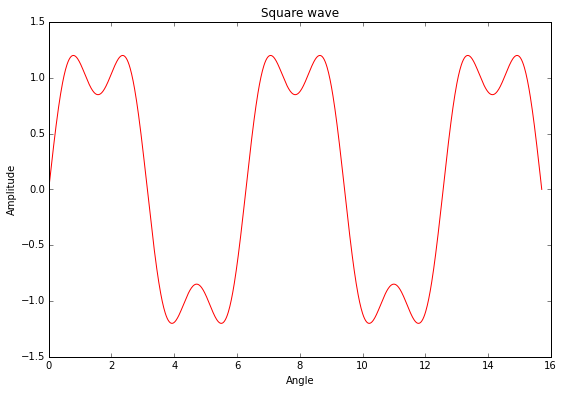

In [5]:
plot_fourier(3)

Let's try for other values of $n$:

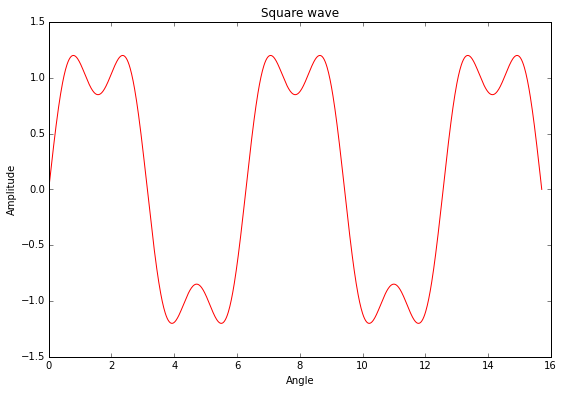

In [6]:
plot_fourier(4)

There's no difference between $n=3$ and $n=4$, and that's to be expected, as the series is defined for odd integers. Let's try $n=5$, we should see a difference:

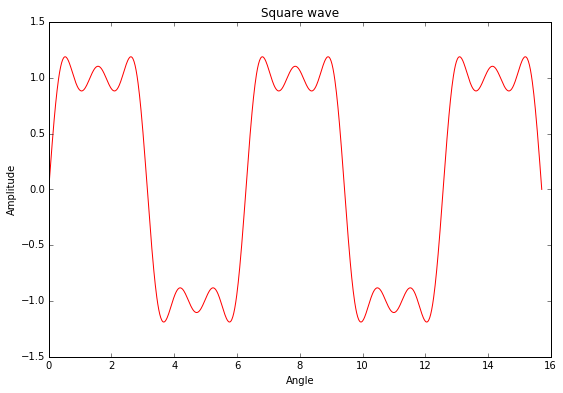

In [7]:
plot_fourier(5)

Even though it's better, it doesn't look very much like the square wave, does it? We can set $n$ as an interactive parameter, and we can observe how modifying it affects our function:

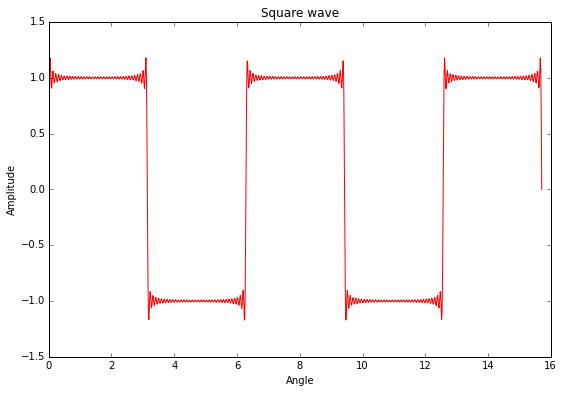

In [8]:
myPlot = interactive(plot_fourier, Z=(1,100,1))
display(myPlot)

We can observe the noise around the ends, which is less noticeable as $n$ increases. We expect our function to be equal to the square wave as $n \rightarrow \infty$. I chose $100$ as the maximum number of terms because the noise reduction is negligible for higher values of $n$, and it takes too much computing power.